## Import Libraries

In [1]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt
import pickle
import numpy as np

## Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Genaral Functions

In [3]:
classes = np.unique(['negative','positive'])

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(classes)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit(integer_encoded)

with open('/content/drive/MyDrive/final_files/label_encoder.pkl','wb') as file:
      pickle.dump(label_encoder,file)

In [4]:
def plot_data(y_lst, title, x_name, y_name):
  x = ['Negative','Positive']
  y = [sum(map(lambda x : x == 'negative', y_lst)) , sum(map(lambda x : x == 'positive', y_lst))]
  plt.bar(x, y) 
  for i in range(len(x)):
      plt.text(i,y[i],y[i])  
  plt.title(title)
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.show()

In [5]:
#  Negative ,  Positive
def cmumosei_round(a):
    if a < 0:
      res = 'negative'
    else:
      res = 'positive'
    return res

## Explore vision data

In [24]:
with open('/content/drive/MyDrive/files/train_vision.pkl', 'rb') as f:
  train_vision = pickle.load(f)

with open('/content/drive/MyDrive/files/valid_vision.pkl', 'rb') as f:
  valid_vision = pickle.load(f)

with open('/content/drive/MyDrive/files/test_vision.pkl', 'rb') as f:
  test_vision = pickle.load(f)

Train

In [25]:
train_vision.keys()

dict_keys(['train_data_vision', 'train_data_labels'])

In [26]:
X_train = train_vision["train_data_vision"]
y_train = train_vision["train_data_labels"]

In [27]:
lst_X_train = []
for matrix in X_train:
    lst_X_train.append(matrix[-1])

In [28]:
X_train_vision = np.array(lst_X_train)
y_train = np.squeeze(y_train)

In [29]:
X_train_vision.shape , y_train.shape

((16326, 35), (16326,))

Valid

In [30]:
valid_vision.keys()

dict_keys(['valid_data_vision', 'valid_data_labels'])

In [31]:
X_valid = valid_vision["valid_data_vision"]
y_valid = valid_vision["valid_data_labels"]

In [32]:
lst_X_valid = []
for matrix in X_valid:
    lst_X_valid.append(matrix[-1])

In [33]:
X_valid_vision = np.array(lst_X_valid)
y_valid = np.squeeze(y_valid)

In [34]:
X_valid_vision.shape , y_valid.shape

((1871, 35), (1871,))

Test

In [35]:
test_vision.keys()

dict_keys(['test_data_vision', 'test_data_labels'])

In [36]:
X_test = test_vision["test_data_vision"]
y_test = test_vision["test_data_labels"]

In [37]:
lst_X_test = []
for matrix in X_test:
    lst_X_test.append(matrix[-1])

In [38]:
X_test_vision = np.array(lst_X_test)
y_test = np.squeeze(y_test)

In [39]:
X_test_vision.shape , y_test.shape

((4659, 35), (4659,))

Encoding labels

In [40]:
y_train_lst = []
y_valid_lst = []
y_test_lst = []

for i in range(len(y_train)):
    y_train_lst.append(cmumosei_round(y_train[i]))
for i in range(len(y_valid)):
    y_valid_lst.append(cmumosei_round(y_valid[i]))
for i in range(len(y_test)):
    y_test_lst.append(cmumosei_round(y_test[i]))

In [41]:
data_label_encoded_train = label_encoder.transform(y_train_lst)
data_label_encoded_train = data_label_encoded_train.reshape(len(data_label_encoded_train), 1)
y_train_vision = onehot_encoder.transform(data_label_encoded_train)

In [42]:
data_label_encoded_valid = label_encoder.transform(y_valid_lst)
data_label_encoded_valid = data_label_encoded_valid.reshape(len(data_label_encoded_valid), 1)
y_valid_vision = onehot_encoder.transform(data_label_encoded_valid)

In [43]:
data_label_encoded_test = label_encoder.transform(y_test_lst)
data_label_encoded_test = data_label_encoded_test.reshape(len(data_label_encoded_test), 1)
y_test_vision = onehot_encoder.transform(data_label_encoded_test)

Plotting

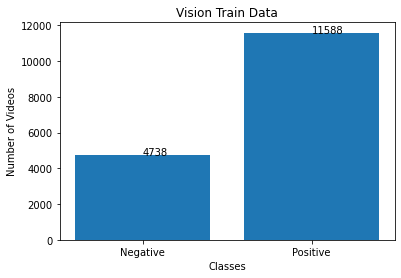

In [44]:
plot_data(y_train_lst, "Vision Train Data", "Classes", "Number of Videos")

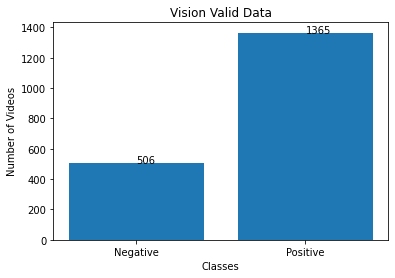

In [45]:
plot_data(y_valid_lst, "Vision Valid Data", "Classes", "Number of Videos")

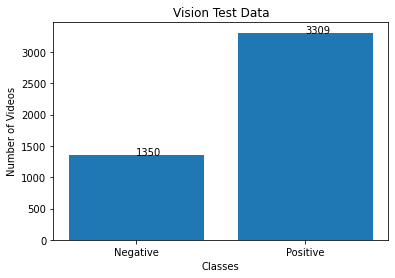

In [46]:
plot_data(y_test_lst, "Vision Test Data", "Classes", "Number of Videos")

Save

In [47]:
with open('/content/drive/MyDrive/final_files/X_train_vision.pkl','wb') as file:
      pickle.dump(X_train_vision,file)
with open('/content/drive/MyDrive/final_files/y_train_vision.pkl','wb') as file:
      pickle.dump(y_train_vision,file)

with open('/content/drive/MyDrive/final_files/X_valid_vision.pkl','wb') as file:
      pickle.dump(X_valid_vision,file)
with open('/content/drive/MyDrive/final_files/y_valid_vision.pkl','wb') as file:
      pickle.dump(y_valid_vision,file)

with open('/content/drive/MyDrive/final_files/X_test_vision.pkl','wb') as file:
      pickle.dump(X_test_vision,file)
with open('/content/drive/MyDrive/final_files/y_test_vision.pkl','wb') as file:
      pickle.dump(y_test_vision,file)

## Explore audio data

In [6]:
with open('/content/drive/MyDrive/files/train_audio.pkl', 'rb') as f:
  train_audio = pickle.load(f)

with open('/content/drive/MyDrive/files/valid_audio.pkl', 'rb') as f:
  valid_audio = pickle.load(f)

with open('/content/drive/MyDrive/files/test_audio.pkl', 'rb') as f:
  test_audio = pickle.load(f)

Train

In [7]:
train_audio.keys()

dict_keys(['train_data_audio', 'train_data_labels'])

In [8]:
X_train = train_audio["train_data_audio"]
y_train = train_audio["train_data_labels"]

In [9]:
lst_X_train = []
for matrix in X_train:
    lst_X_train.append(matrix[-1])

In [10]:
X_train_audio = np.array(lst_X_train)
y_train = np.squeeze(y_train)

In [11]:
X_train_audio.shape , y_train.shape

((16326, 74), (16326,))

valid

In [12]:
valid_audio.keys()

dict_keys(['valid_data_audio', 'valid_data_labels'])

In [13]:
X_valid = valid_audio["valid_data_audio"]
y_valid = valid_audio["valid_data_labels"]

In [14]:
lst_X_valid = []
for matrix in X_valid:
    lst_X_valid.append(matrix[-1])

In [15]:
X_valid_audio = np.array(lst_X_valid)
y_valid = np.squeeze(y_valid)

In [16]:
X_valid_audio.shape , y_valid.shape

((1871, 74), (1871,))

Test

In [17]:
test_audio.keys()

dict_keys(['test_data_audio', 'test_data_labels'])

In [18]:
X_test = test_audio["test_data_audio"]
y_test = test_audio["test_data_labels"]

In [19]:
lst_X_test = []
for matrix in X_test:
    lst_X_test.append(matrix[-1])

In [20]:
X_test_audio = np.array(lst_X_test)
y_test = np.squeeze(y_test)

In [21]:
X_test_audio.shape , y_test.shape

((4659, 74), (4659,))

Encoding labels

In [22]:
y_train_lst = []
y_valid_lst = []
y_test_lst = []

for i in range(len(y_train)):
    y_train_lst.append(cmumosei_round(y_train[i]))
for i in range(len(y_valid)):
    y_valid_lst.append(cmumosei_round(y_valid[i]))
for i in range(len(y_test)):
    y_test_lst.append(cmumosei_round(y_test[i]))

In [23]:
data_label_encoded_train = label_encoder.transform(y_train_lst)
data_label_encoded_train = data_label_encoded_train.reshape(len(data_label_encoded_train), 1)
y_train_aduio = onehot_encoder.transform(data_label_encoded_train)

In [24]:
data_label_encoded_valid = label_encoder.transform(y_valid_lst)
data_label_encoded_valid = data_label_encoded_valid.reshape(len(data_label_encoded_valid), 1)
y_valid_aduio = onehot_encoder.transform(data_label_encoded_valid)

In [25]:
data_label_encoded_test = label_encoder.transform(y_test_lst)
data_label_encoded_test = data_label_encoded_test.reshape(len(data_label_encoded_test), 1)
y_test_aduio = onehot_encoder.transform(data_label_encoded_test)

Plotting

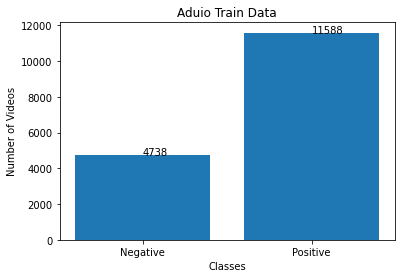

In [26]:
plot_data(y_train_lst, "Aduio Train Data", "Classes", "Number of Videos")

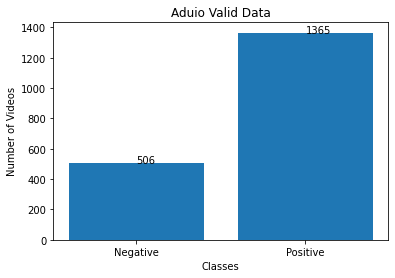

In [27]:
plot_data(y_valid_lst, "Aduio Valid Data", "Classes", "Number of Videos")

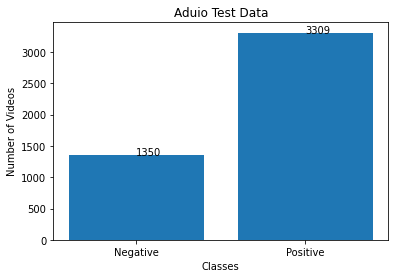

In [28]:
plot_data(y_test_lst, "Aduio Test Data", "Classes", "Number of Videos")

Save

In [29]:
with open('/content/drive/MyDrive/final_files/X_train_audio.pkl','wb') as file:
      pickle.dump(X_train_audio,file)
with open('/content/drive/MyDrive/final_files/y_train_aduio.pkl','wb') as file:
      pickle.dump(y_train_aduio,file)

with open('/content/drive/MyDrive/final_files/X_valid_audio.pkl','wb') as file:
      pickle.dump(X_valid_audio,file)
with open('/content/drive/MyDrive/final_files/y_valid_aduio.pkl','wb') as file:
      pickle.dump(y_valid_aduio,file)

with open('/content/drive/MyDrive/final_files/X_test_audio.pkl','wb') as file:
      pickle.dump(X_test_audio,file)
with open('/content/drive/MyDrive/final_files/y_test_aduio.pkl','wb') as file:
      pickle.dump(y_test_aduio,file)

## Explore text data

In [30]:
with open('/content/drive/MyDrive/files/train_text.pkl', 'rb') as f:
  train_text = pickle.load(f)

with open('/content/drive/MyDrive/files/valid_text.pkl', 'rb') as f:
  valid_text = pickle.load(f)

with open('/content/drive/MyDrive/files/test_text.pkl', 'rb') as f:
  test_text = pickle.load(f)

Train

In [31]:
train_text.keys()

dict_keys(['train_data_text', 'train_data_labels'])

In [32]:
X_train_text = train_text["train_data_text"]
y_train = train_text["train_data_labels"]

In [33]:
y_train = np.squeeze(y_train)

In [34]:
X_train_text.shape , y_train.shape

((16326, 50, 300), (16326,))

Valid

In [35]:
valid_text.keys()

dict_keys(['valid_data_text', 'valid_data_labels'])

In [36]:
X_valid_text = valid_text["valid_data_text"]
y_valid = valid_text["valid_data_labels"]

In [37]:
y_valid = np.squeeze(y_valid)

In [38]:
X_valid_text.shape , y_valid.shape

((1871, 50, 300), (1871,))

Test

In [39]:
test_text.keys()

dict_keys(['test_data_text', 'test_data_labels'])

In [40]:
X_test_text = test_text["test_data_text"]
y_test = test_text["test_data_labels"]

In [41]:
y_test = np.squeeze(y_test)

In [42]:
X_test_text.shape , y_test.shape

((4659, 50, 300), (4659,))

Encoding labels

In [43]:
y_train_lst = []
y_valid_lst = []
y_test_lst = []

for i in range(len(y_train)):
    y_train_lst.append(cmumosei_round(y_train[i]))
for i in range(len(y_valid)):
    y_valid_lst.append(cmumosei_round(y_valid[i]))
for i in range(len(y_test)):
    y_test_lst.append(cmumosei_round(y_test[i]))

In [44]:
data_label_encoded_train = label_encoder.transform(y_train_lst)
data_label_encoded_train = data_label_encoded_train.reshape(len(data_label_encoded_train), 1)
y_train_text = onehot_encoder.transform(data_label_encoded_train)

In [45]:
data_label_encoded_train = label_encoder.transform(y_valid_lst)
data_label_encoded_train = data_label_encoded_train.reshape(len(data_label_encoded_train), 1)
y_valid_text = onehot_encoder.transform(data_label_encoded_train)

In [46]:
data_label_encoded_train = label_encoder.transform(y_test_lst)
data_label_encoded_train = data_label_encoded_train.reshape(len(data_label_encoded_train), 1)
y_test_text = onehot_encoder.transform(data_label_encoded_train)

Plotting

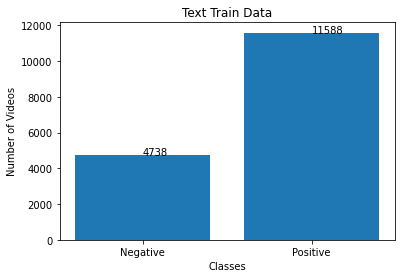

In [47]:
plot_data(y_train_lst, "Text Train Data", "Classes", "Number of Videos")

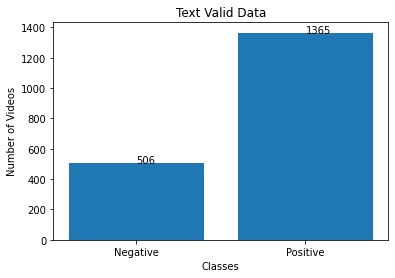

In [48]:
plot_data(y_valid_lst, "Text Valid Data", "Classes", "Number of Videos")

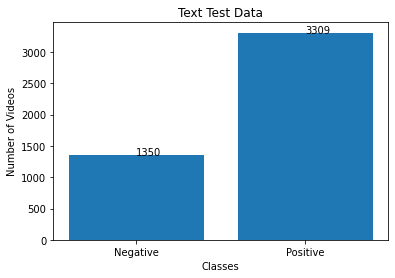

In [49]:
plot_data(y_test_lst, "Text Test Data", "Classes", "Number of Videos")

Save

In [50]:
with open('/content/drive/MyDrive/final_files/X_train_text.pkl','wb') as file:
      pickle.dump(X_train_text,file)
with open('/content/drive/MyDrive/final_files/y_train_text.pkl','wb') as file:
      pickle.dump(y_train_text,file)

with open('/content/drive/MyDrive/final_files/X_valid_text.pkl','wb') as file:
      pickle.dump(X_valid_text,file)
with open('/content/drive/MyDrive/final_files/y_valid_text.pkl','wb') as file:
      pickle.dump(y_valid_text,file)

with open('/content/drive/MyDrive/final_files/X_test_text.pkl','wb') as file:
      pickle.dump(X_test_text,file)
with open('/content/drive/MyDrive/final_files/y_test_text.pkl','wb') as file:
      pickle.dump(y_test_text,file)